# Compare GaN overlaps in different supercells

We want to test the convergence of the overlap between different states in the defect supercell and those in the perfect-crystal supercell to see if we need to use the Sommerfeld factor. Alkauskas et. al and one of our referees argue that the 96-atom supercell is not properly converged with respect to the delocalization of the valence band states. They argue that the Sommerfeld factor is missing, which can adjust the capture coefficient by 1-2 orders of magnitude. Let's look at different wave function overlaps in supercells 3x2x2, 5x3x3, 6x4x4, 8x5x5, and 9x6x6 to test the convergence.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib import rc
#rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('font', **{'family': 'serif', 'serif': ['Times']})
rc('text', usetex=True)

In [11]:
nAtoms = [96, # 3x2x2
          360, # 5x3x3
          768, # 6x4x4
          1600, # 8x5x5
          2592] # 9x6x6

# Overlap between the defect and pristine CBM
CBMSD_CBMPC = [9.803632227947890E-001, # 96
               9.901573474203822E-001, # 360
               9.925435829775425E-001, #768
               9.926678554503600E-001, #1600
               9.930251422939422E-001] #2592

# Overlap of defect level with VBM and 3 bands below
DefSD_VBMPC = [3.535734641434085E-009, # 96
               4.588666453102864E-007, # 360
               9.862905031299268E-007, # 768
               3.295097978015579E-005, # 1600
               4.010814653167656E-005] # 2592
DefSD_VBML1PC = [4.370633208362935E-008, # 96
                 6.254614749696933E-008, # 360
                 1.766788389670831E-005, # 768
                 1.316649708272426E-004, # 1600
                 9.453934212677938E-005] # 2592
DefSD_VBML2PC = [5.973174893373839E-001, # 96
                 5.783766897141163E-001, # 360
                 5.039005765598535E-001, # 768
                 4.587532748734625E-001, # 1600
                 3.633778895853938E-001] # 2592
DefSD_VBML3PC = [3.259380906898923E-008, # 96
                 6.864914283569494E-003, # 360
                 6.811864153342879E-002, # 768
                 2.456924916679407E-002, # 1600
                 1.107384688895530E-001] # 2592


# Overlap of defect VBM with various valence states in
# the perfect crystal
VBMSD_VBMPC = [2.503706958454260E-004, # 96
               2.995733662697674E-004, # 360
               5.272394541551150E-004, # 768
               7.858818904279795E-005, # 1600
               6.418567051975235E-005] # 2592
VBMSD_VBML1PC = [7.760912992389771E-001, # 96
                 7.076905274955677E-001, # 360
                 6.724852061798143E-001, # 768
                 6.077831700249136E-001, # 1600
                 5.357132219198076E-001] # 2592
VBMSD_VBML2PC = [2.809858275395589E-008, # 96
                 5.434528681606372E-006, # 360
                 1.805474964982145E-005, # 768
                 2.581693882208604E-004, # 1600
                 2.148065980367694E-004] # 2592
VBMSD_VBML3PC = [4.015659300167281E-002, # 96
                 2.123330128462592E-005, # 360
                 3.128634810482919E-006, # 768
                 3.199996741374400E-005, # 1600
                 2.236665513827507E-005] # 2592
VBMSD_VBML7PC = [2.461406129019421E-009, # 96
                 8.197066648212080E-002, # 360
                 7.211431745990608E-002, # 768
                 2.678735446199561E-002, # 1600
                 5.799595678245235E-002] # 2592
VBMSD_VBML8PC = [5.645235669770173E-009, # 96
                 1.550188576410912E-003, # 360
                 2.080649868087291E-006, # 768
                 5.906660377144721E-002, # 1600
                 4.022419963618867E-002] # 2592
VBMSD_VBML9PC = [6.509069705794193E-004, # 96
                 2.376438111500739E-004, # 360
                 1.637449826830974E-002, # 768
                 2.894327420316485E-006, # 1600
                 1.330167887765355E-005] # 2592
VBMSD_VBML10PC = [1.816462842718034E-008, # 96
                  2.719518737085976E-005, # 360
                  4.455464773682121E-007, # 768
                  4.978026482564422E-005, # 1600
                  4.172418316575715E-005] # 2592

# Sum of the overlaps between the defect VBM and the 
# states in the perfect crystal that have significant
# overlap and are close in energy
VBMSD_VBML1Plus7to10PC = np.array(VBMSD_VBML1PC) + np.array(VBMSD_VBML7PC) + np.array(VBMSD_VBML8PC) + np.array(VBMSD_VBML9PC) + np.array(VBMSD_VBML10PC)


# Overlap between band below VBM in defect cell and 
# perfect-crystal VBM
VBML1SD_VBMPC = [9.357694636290438E-001, # 96
                 9.389787141532465E-001, # 360
                 9.570467084930648E-001, # 768
                 9.686545176930433E-001, # 1600
                 9.735632853050451E-001] # 2592

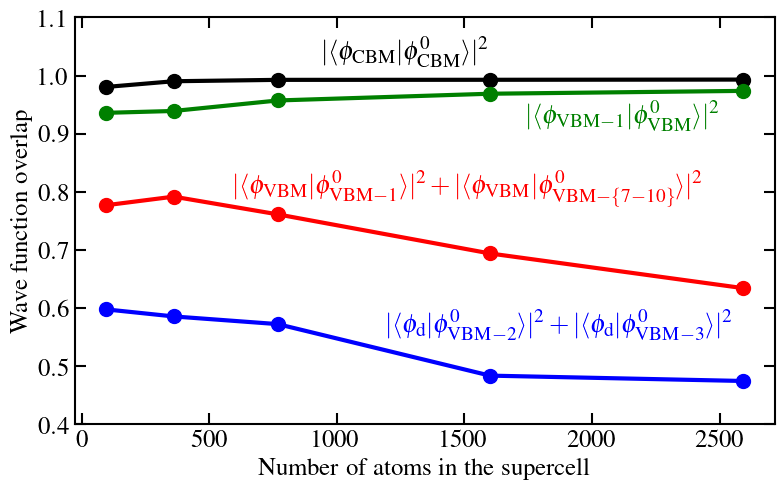

In [52]:
plt.figure(figsize=(8,5))

# Paper figure with smeared results
plt.plot(nAtoms, CBMSD_CBMPC, color='black', label='$|\langle \phi_{\mathrm{CBM}}|\phi^0_{\mathrm{CBM}}\\rangle|^2$', linewidth=3, marker='o', markersize=10)
plt.plot(nAtoms, VBML1SD_VBMPC, color='green', label='$|\langle \phi_{\mathrm{VBM}-1}|\phi^0_{\mathrm{VBM}}\\rangle|^2$', linewidth=3, marker='o', markersize=10)

#plt.plot(nAtoms, DefSD_VBMPC, color='blue', linewidth=3, linestyle='solid', marker='o', markersize=10)
#plt.plot(nAtoms, DefSD_VBML1PC, color='blue', linewidth=3, linestyle='dashed', marker='o', markersize=10)
#plt.plot(nAtoms, DefSD_VBML2PC, color='blue', linewidth=3, linestyle='dotted', marker='o', markersize=10)
#plt.plot(nAtoms, DefSD_VBML3PC, color='blue', linewidth=3, linestyle='dashdot', marker='o', markersize=10)
plt.plot(nAtoms, np.array(DefSD_VBML2PC) + np.array(DefSD_VBML3PC), color='blue', linewidth=3, linestyle='solid', marker='o', markersize=10)

#plt.plot(nAtoms, VBMSD_VBMPC, color='red', linewidth=3, linestyle='solid', marker='o', markersize=10)
#plt.plot(nAtoms, VBMSD_VBML7to10PC, color='red', linewidth=3, linestyle='dotted', marker='o', markersize=10)
plt.plot(nAtoms, VBMSD_VBML1Plus7to10PC, color='red', linewidth=3, linestyle='solid', marker='o', markersize=10)
#plt.plot(nAtoms, VBMSD_VBML1PC, color='red', linewidth=3, linestyle='dashed', marker='o', markersize=10)
#plt.plot(nAtoms, VBMSD_VBML2PC, color='red', linewidth=3, linestyle='dotted', marker='o', markersize=10)
#plt.plot(nAtoms, VBMSD_VBML3PC, color='red', linewidth=3, linestyle='dashdot', marker='o', markersize=10)


#plt.plot(nAtoms, VBMSD_VBML1PC, color='red', linewidth=3, marker='o', markersize=10)

plt.text(950, 1.03, 
         '$|\langle \phi_{\mathrm{CBM}}|\phi^0_{\mathrm{CBM}}\\rangle|^2$', 
         fontsize=19, 
         ha='left',
         color='black')
plt.text(1750, 0.92, 
         '$|\langle \phi_{\mathrm{VBM}-1}|\phi^0_{\mathrm{VBM}}\\rangle|^2$', 
         fontsize=19, 
         ha='left',
         color='green')
plt.text(1200, 0.56, 
         '$|\langle \phi_{\mathrm{d}}|\phi^0_{\mathrm{VBM}-2}\\rangle|^2 +|\langle \phi_{\mathrm{d}}|\phi^0_{\mathrm{VBM}-3}\\rangle|^2$', 
         fontsize=19, 
         ha='left',
         color='blue')
#plt.text(850, 0.35, 
#         '$|\langle \phi_{\mathrm{d}}|\phi^0_{\mathrm{VBM}-2}\\rangle|^2$', 
#         fontsize=19, 
#         ha='left',
#         color='blue')
#plt.text(1600, 0.15, 
#         '$|\langle \phi_{\mathrm{d}}|\phi^0_{\mathrm{VBM}-3}\\rangle|^2$', 
#         fontsize=19, 
#         ha='left',
#         color='blue')
plt.text(600, 0.8, 
         '$|\langle \phi_{\mathrm{VBM}}|\phi^0_{\mathrm{VBM}-1}\\rangle|^2+ |\langle \phi_{\mathrm{VBM}}|\phi^0_{\mathrm{VBM}-\{7-10\}}\\rangle|^2$', 
         fontsize=19, 
         ha='left',
         color='red')
#plt.text(1250, 0.85, 
#         '$+ |\langle \phi_{\mathrm{VBM}}|\phi^0_{\mathrm{VBM}-\{7-10\}}\\rangle|^2$', 
#         fontsize=19, 
#         ha='left',
#         color='red')

# Decided not to include these HSE results because it is hard to identify 
# the bands to match up exactly because of the degeneracies and differences
# between PBE and HSE
#plt.plot(96, 9.333077738614747E-001, color='black', linewidth=3, marker='x', markersize=10)
#plt.plot(96, 4.861743058240405E-001, color='blue', linewidth=3, marker='x', markersize=10)
#plt.plot(96, 4.202853367506761E-001, color='red', linewidth=3, marker='x', markersize=10)

# Labels
plt.xlabel('Number of atoms in the supercell', fontsize=18)
plt.ylabel('Wave function overlap', fontsize=18)

# Plot formatting
#plt.legend(loc='upper right', fontsize=18, frameon=False,bbox_to_anchor=(0.9,0.9))  # Move the legend to the top right and increase font size
plt.xticks(fontsize=18)  # Increase x-axis tick font size
plt.yticks(fontsize=18)  # Increase y-axis tick font size
plt.ylim(0.4,1.1)
#plt.xlim(0.8,2.0)
ax = plt.gca()
ax.spines['top'].set_linewidth(1.5)   # Top border
ax.spines['right'].set_linewidth(1.5) # Right border
ax.spines['bottom'].set_linewidth(1.5)  # Bottom border (default width)
ax.spines['left'].set_linewidth(1.5)    # Left border (default width)
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='minor',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=4, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='major',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=1.5,  # Thickness of the tick marks
               length=8, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
#locmin = ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
#ax.yaxis.set_minor_locator(locmin)
#ax.yaxis.set_minor_formatter(ticker.NullFormatter())
plt.tight_layout()
plt.savefig('overlapSupercellConvergence.png',dpi=1200)
plt.show()